In [20]:
import pandas as pd
data = pd.read_csv("files/Language_Detection.csv")
data.head(10)


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [21]:
p=data["Language"].value_counts() 
p=p/len(data)*100
p

English       13.398472
French         9.809422
Spanish        7.922995
Portugeese     7.149076
Italian        6.752443
Russian        6.694399
Sweedish       6.539615
Malayalam      5.746348
Dutch          5.281997
Arabic         5.185257
Turkish        4.585470
German         4.546774
Tamil          4.537100
Danish         4.140466
Kannada        3.569701
Greek          3.531005
Hindi          0.609461
Name: Language, dtype: float64

In [22]:
X = data["Text"]
y = data["Language"]

In [23]:
X = data["Text"]
y = data["Language"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
set(y) #permet d'afficher les valeurs possibles de y sans redondance 


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [24]:
import re
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)
for i in range(10):
    print(X[1000*i])
    print(data_list[1000*i])
    print("-----------")



 Nature, in the broadest sense, is the natural, physical, material world or universe.
 nature  i  the broadest se se  is the  atural  physical  material world or u iverse.
-----------
When trained on man-made data, machine learning is likely to pick up the same constitutional and unconscious biases already present in society.
whe  trai ed o  ma -made data  machi e lear i g is likely to pick up the same co stitutio al a d u co scious biases already prese t i  society.
-----------
वाक्यांश संख्या दो, जब आपने किसी को कुछ समय के लिए नहीं देखा है, तो आप उसे बताएंगे कि कोई समय नहीं है, तो इसका मतलब है कि आपने इस व्यक्ति को शायद हफ्तों या महीनों में नहीं देखा है जब तक कि वाक्यांश संख्या नहीं देखी जाती है। तीन अगर आप पूछना चाहते हैं कि आप क्या कर रहे हैं। आप पूछते हैं कि आपके जीवन में क्या चल रहा था?
वाक्यांश संख्या दो  जब आपने किसी को कुछ समय के लिए नहीं देखा है  तो आप उसे बताएंगे कि कोई समय नहीं है  तो इसका मतलब है कि आपने इस व्यक्ति को शायद हफ्तों या महीनों में नहीं देखा है जब तक कि वाक्यां

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape
#print(cv.get_feature_names())

(10337, 34937)

In [26]:
import gc
del data_list
gc.collect()

22029

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np
y = y.astype(np.int8)
X = X.astype(np.int16)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [28]:
len(x_train)
len(x_test)

2068

In [29]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [30]:
import pickle
filename = 'language_detection_model.sav'
pickle.dump(model, open(filename, 'wb'))

97.48549323017409


C:\Users\souhm\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


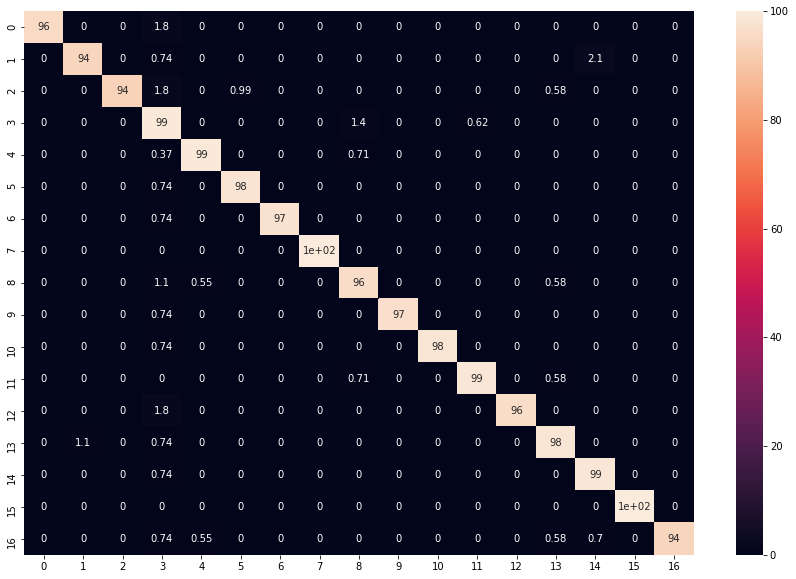

In [31]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ac = 100*accuracy_score(y_test, y_pred)
print(ac)
cm = confusion_matrix(y_test, y_pred)
cm=100*cm/ cm.astype(np.float).sum(axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [33]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [35]:
predict("Est-ce que cet exercice vous a permis d'avoir un aperçu introductif au traitement naturel du langage ?")
predict("Did this exercise give you an introductory overview to natural language processing?")
predict("Bu alıştırma size doğal dil işlemeye giriş niteliğinde bir genel bakış sağladı mı?")
predict("هل أعطاك هذا التمرين نظرة عامة تمهيدية حول معالجة اللغة الطبيعية؟")
predict("¿Este ejercicio le brindó una introducción al procesamiento del lenguaje natural?")
predict("ഈവŖായാമംനിšൾŚ്സřാഭാവികഭാഷാ േŗപാസƋിംഗിŀെറഒരുആമുഖഅവേലാകനംനൽകിേയാ?")
predict("Это упражнение дало вам вводный обзор обработки естественного языка?")

The langauge is in French
The langauge is in English
The langauge is in Turkish
The langauge is in Arabic
The langauge is in Spanish
The langauge is in Malayalam
The langauge is in Russian
